In [23]:
from fastapi import FastAPI

# 1. 타입 선언

## 1) 타입 힌트 추가 전-후
- (1) 타입힌트가 필수는 아니지만, 타입힌트를 추가하면 변수 뒤 '.'후 tab(or ctrl + space)을 통해 자동완성 수행 시 원하는 옵션을 찾기에 수월해짐
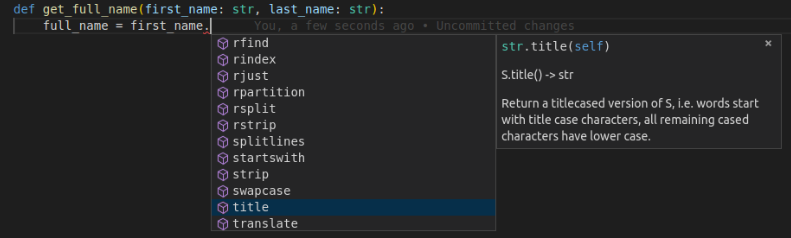
- (2) 타입힌트를 정의함으로써 오류 시 에러 확인 명확

In [4]:
def get_full_name(first_name : str, last_name : str):
    full_name = first_name.title() + " " + last_name.title()
    return full_name

In [5]:
print(get_full_name("john", "doe"))

John Doe


In [8]:
def get_name_with_age(name : str, age : int):
    name_with_age = name + " is this old : " + str(age)
    return name_with_age

In [9]:
print(get_name_with_age("john", 23))

john is this old : 23


## 2) 타입 매개변수를 활용한 제네릭 타입
- (1) dict, list, set, tuple 같은 값을 저장할 수 있는 구조 내부에 값은 각자의 타입을 가질 수 있음
- (2) 타입과 내부타입 선언을 위해 typing(파이썬 표준 모듈) 이용
    * 타입 매개변수 : 대괄호 안의 내부 타입을 지칭하는 용어
    * Generic 타입 or Generics : List, Tuple, Set, Dict, Optional 등등

### 가) List

In [10]:
from typing import List

In [12]:
def process_items(items : List[str]):
    for item in items : 
        print(item)
# items는 list 자료형이며, 배열에 들어있는 아이템 각각은 str

### 나) Set, Tuple

In [13]:
from typing import Set, Tuple

In [15]:
def process_items(items_t : Tuple[int, int, str], items_s : Set[bytes]):
    return items_t, items_s
# items_t : (int, int, str) 순서의 tuple
# items_s : 각 아이템이 bytes인 set

### 다) Dict

In [16]:
from typing import Dict

In [18]:
def process_items(prices : Dict[str, float]):
    for item_name, item_price in prices.items():
        print(item_name)
        print(imte_price)
# prices : dict 자료형태
# dict의 key 자료형 : str
# dict의 value 자료형 : float

### 라) optional

In [19]:
from typing import Optional

In [20]:
def say_hi(name : Optional[str] = None):
    if name is not None:
        print(f"Hey {name}!")
    else : 
        print("Hello World")
# Optional[str]을 str 대신 사용하게 되면, 특정 값이 실제로는 None이 될 수도 있는데 항상 str이라고 가정하는 상황에서 에디터(자동완성 기능)가 에러를 찾도록 도와줄 수 있음

### 마) 타입으로서 클래스

In [22]:
class Person:
    def __init__(self, name : str):
        self.name = name

def get_person_name(one_person : Person):
    return one_person.name

# 2. Pydantic 모델
- 데이터 검증(validation)을 위한 파이썬 라이브러리
- pydantic 사용이유
    - 타입 힌트 기반 : pydantic 사용 시 스키마 검증 및 직렬화가 타입 주석 으로 제어됨
    - 속도 : pydantic의 핵심 검증 로직은 rust로 작성되어 python에서 가장 빠른 데이터 검증 라이브러리 중 하나
    - json 스키마 : pydantic 모델은 json스키라를 생성할 수 있어 다른 도구와 쉽게 통합 가능
    - 사용자 정의 : 사용자 정의 유효성 검사와 직렬화기를 통해 데이터 처리 방식을 다양하고 강력한 방식으로 변경가능
    - 보편화된 생태계 : fastapi, huggingface, django 등 많은 패키지에서 pydantic 사용중